# Activation Functions 
###   เป็นส่วนประกอบที่สำคัญของโครงข่ายประสาทเทียม ใช้ทั้งแทรกระหว่างแต่ละชั้นเพื่อให้เกิดการคำนวณที่ไม่เป็นเชิงเส้น และใช้ทั้งในชั้นสุดท้ายก่อนคำนวณค่าเสียหายเพื่อจะทำการแพร่ย้อนกลับ

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, '../../Side Stories/')
from unagi import Chan, Param

In [7]:
class Sigmoid(Chan):
    def pai(self,a):
        self.h = 1/(1+np.exp(-a))
        return self.h

    def yon(self,g):
        return g*(1.-self.h)*self.h


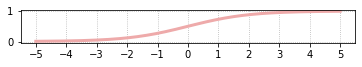

In [9]:
def plot(f):
    a = np.linspace(-5,5,201)
    h = f.pai(a)
    plt.axes(aspect=1,xticks=range(-5,6),yticks=range(-5,6))
    plt.plot(a,h,'#eeaaaa',lw=3)
    plt.grid(ls=':')
    plt.show()

plot(Sigmoid())


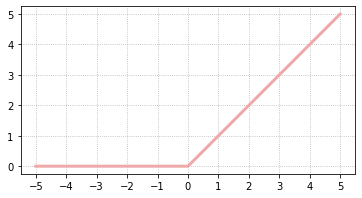

In [10]:
class Relu(Chan):
    def pai(self,x):
        self.krong = (x>0)
        return np.where(self.krong,x,0)

    def yon(self,g):
        return np.where(self.krong,g,0)

plot(Relu())


# LReLu
###  leaky rectified linear unit
## \begin{align}
\text{LReLu}(x) =
\left\{ \begin{array}{ll}
x \; &ถ้า& x \ge 0 \\
ax \; &ถ้า& x \le 0 \\
\end{array}
\right.
\end{align}
### a ซึ่งเป็นค่าที่จะกำหนดเท่าไหร่ก็ได้ (ถ้า a=0 ก็จะกลายเป็น ReLU ธรรมดา)


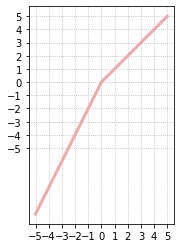

In [15]:
class Lrelu(Chan):
    def __init__(self,a=0.01):
        self.a = a

    def pai(self,x):
        self.krong = (x>0)
        return x*np.where(self.krong,1,self.a)

    def yon(self,g):
        return g*np.where(self.krong,1,self.a)

plot(Lrelu(2))


# PReLu
### parametric rectified linear unit
## \begin{align}
\text{PReLU}(x) =
\left\{ \begin{array}{ll}
x_j \; &ถ้า& x_j \ge 0 \\
a_jx_j \; &ถ้า& x_j \le 0 \\
\end{array}
\right.
\end{align}
### คล้ายกับ LReLU เพียงแต่ a ในที่นี้เป็นพารามิเตอร์ซึ่งมีจำนวนเท่ากับจำนวนตัวแปรในชั้นนั้น และต้องปรับค่าให้เหมาะสมไปในขณะเรียนรู้


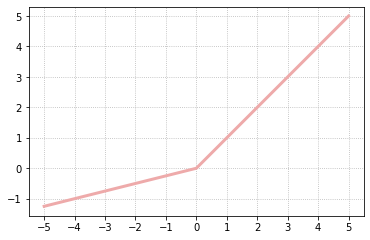

In [18]:
class Prelu(Chan):
    def __init__(self,m,a=0.25):
        self.param = [Param(np.ones(m)*a)]

    def pai(self,x):
        self.krong = (x>0)
        self.x = x
        return x*np.where(self.krong,1,self.param[0].kha)

    def yon(self,g):
        self.param[0].g += (self.x*(self.krong==0)).sum(0)
        return g*np.where(self.krong,1,self.param[0].kha)

plot(Prelu(1,0.25))

# ELU
### exponential rectified linear unit
## \begin{align}
\text{ELU}(x) =
\left\{ \begin{array}{ll}
x \; &ถ้า& x \ge 0 \\
a(e^x-1) \; &ถ้า& x \le 0 \\
\end{array}
\right.
\end{align}

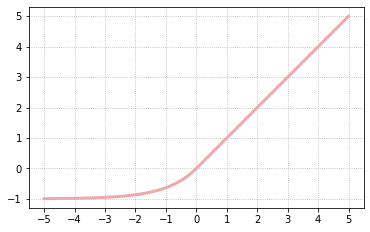

In [19]:
class Elu(Chan):
    def __init__(self,a=1):
        self.a = a

    def pai(self,x):
        self.krong = (x>0)
        self.h = np.where(self.krong,x,self.a*(np.exp(x)-1))
        return self.h

    def yon(self,g):
        return g*np.where(self.krong,1,(self.h+self.a))

plot(Elu(1))